In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import scipy.stats as st
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")

sig_npc = set(npc.loc[npc.padj<0.05].index)
sig_esc = set(esc.loc[esc.padj<0.05].index)

In [3]:
common = sig_npc.intersection(sig_esc)

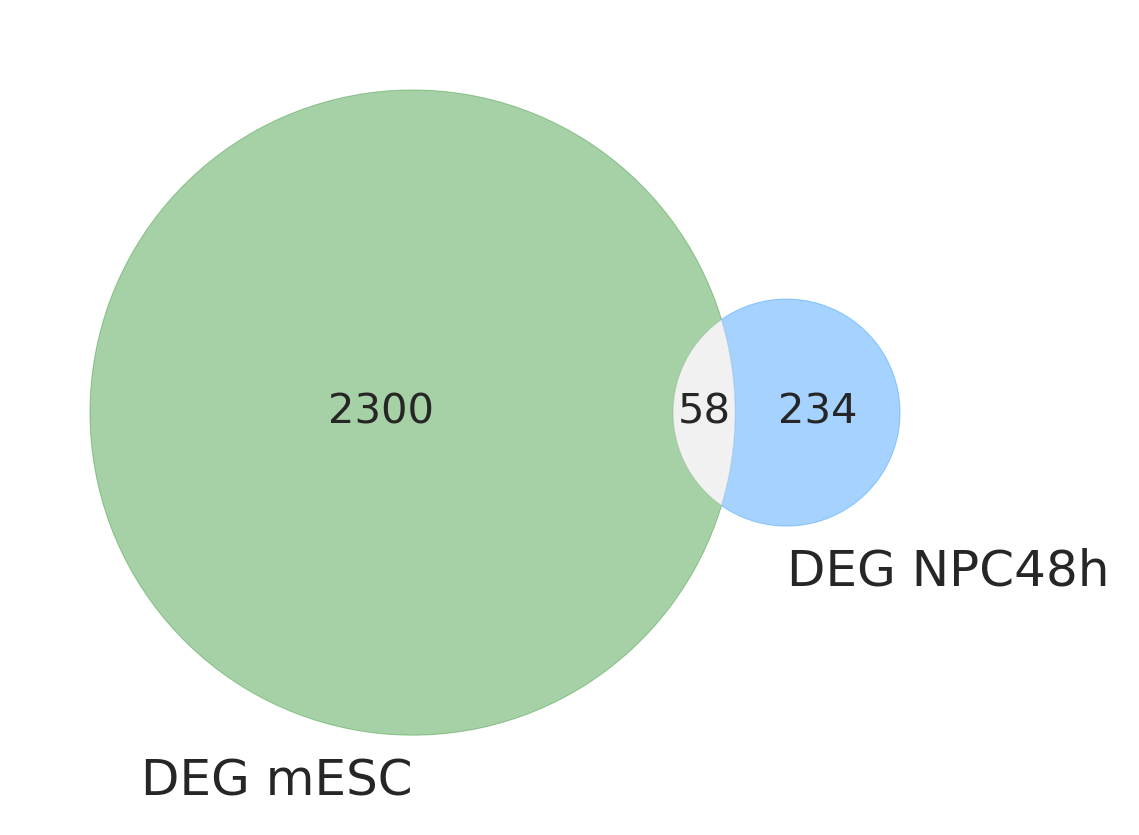

In [4]:
plt.figure(dpi=300, figsize=(4,4))
v = venn2([sig_esc, sig_npc], set_labels = ["DEG mESC", "DEG NPC48h"])
v.get_patch_by_id('01').set_color('dodgerblue')
v.get_patch_by_id('10').set_color('forestgreen')
v.get_patch_by_id('11').set_color('gainsboro')
plt.savefig("../FIGURES/intersect_NPC48h_mESC.png")
plt.savefig("../FIGURES/intersect_NPC48h_mESC.pdf")

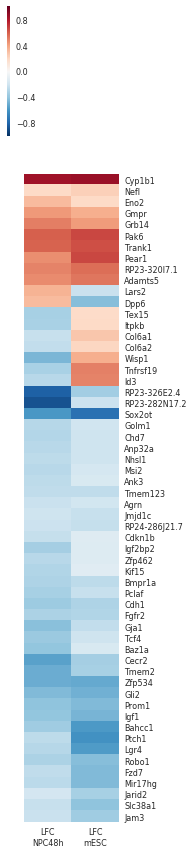

In [5]:
com_npc = npc.loc[[True if i in common else False for i in npc.index]][["log2FoldChange", "symbol"]]
com_npc.index = com_npc.symbol.values
com_npc.drop("symbol", axis=1, inplace=True)

com_esc = esc.loc[[True if i in common else False for i in esc.index]][["log2FoldChange", "symbol"]]
com_esc.index = com_esc.symbol.values
com_esc.drop("symbol", axis=1, inplace=True)

final = com_npc.merge(com_esc, how="right", right_index=True, left_index=True)
final.columns = ["LFC\nNPC48h", "LFC\nmESC"]
f = sns.clustermap(final, cmap="RdBu_r", center=0, vmin=-1,vmax=1, figsize=(2,15), row_cluster=True)
f.ax_row_dendrogram.set_visible(False)
f.ax_col_dendrogram.set_visible(False)
plt.setp(f.ax_heatmap.get_xticklabels(), rotation=0, ha='center')
f.savefig("../FIGURES/LFC_intersect.png", dpi=300)
f.savefig("../FIGURES/LFC_intersect.pdf", dpi=300)